In [10]:
import numpy as np
import torch
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np 
import math 
from skimage.io import imread, imshow
import os
import random
#import cv2

In [5]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


**Carga de datos local**

In [6]:
path_Covid = r'C:\Users\Cracker31\Desktop\JOSE\maestria\UTEC\ciclo2\ai\proyecto3\archive\COVID-19_Radiography_Dataset\COVID' 
path_Normal = r'C:\Users\Cracker31\Desktop\JOSE\maestria\UTEC\ciclo2\ai\proyecto3\archive\COVID-19_Radiography_Dataset\Normal'
path_Lung_Opacity = r'C:\Users\Cracker31\Desktop\JOSE\maestria\UTEC\ciclo2\ai\proyecto3\archive\COVID-19_Radiography_Dataset\Lung_Opacity'
path_Viral_Pneumonia = r'C:\Users\Cracker31\Desktop\JOSE\maestria\UTEC\ciclo2\ai\proyecto3\archive\COVID-19_Radiography_Dataset\Viral Pneumonia'

In [7]:
#### Funcion para leer imagenes dentro de una carpeta
width = 299
height = 299
#files = 3000
def imageReading (path,files):
    folderFilesids = os.listdir(path)
    filesRandom = random.sample(folderFilesids, files)
    #folderFilesids = os.listdir(path)
    images = np.zeros((files, height, width))
    for count, n in enumerate(filesRandom):
        if(count == files):
          break
        else:
          path1 = path + '\\' + n
          originalImage = imread(path1)
          if (len(originalImage.shape)==2):
              originalImage = imread(path1)[:,:]
          if (len(originalImage.shape)==3):
              originalImage = imread(path1)[:,:,0]
          #print(originalImage.shape)
          images[count] = originalImage
    imshow(images[0])
    plt.show()
    return images
"""
#### Funcion para leer imagenes dentro de una carpeta
width = 299
height = 299
def imageReading (path):
    folderFilesids = os.listdir(path)
    images = np.zeros((len(folderFilesids), height, width))
    for count, n in enumerate(folderFilesids):
        path1 = path + '\\' + n
        originalImage = imread(path1)
        if (len(originalImage.shape)==2):
            originalImage = imread(path1)[:,:]
        if (len(originalImage.shape)==3):
            originalImage = imread(path1)[:,:,0]
        #print(originalImage.shape)
        images[count] = originalImage
    imshow(images[0])
    plt.show()
    return images
"""

"\n#### Funcion para leer imagenes dentro de una carpeta\nwidth = 299\nheight = 299\ndef imageReading (path):\n    folderFilesids = os.listdir(path)\n    images = np.zeros((len(folderFilesids), height, width))\n    for count, n in enumerate(folderFilesids):\n        path1 = path + '\\' + n\n        originalImage = imread(path1)\n        if (len(originalImage.shape)==2):\n            originalImage = imread(path1)[:,:]\n        if (len(originalImage.shape)==3):\n            originalImage = imread(path1)[:,:,0]\n        #print(originalImage.shape)\n        images[count] = originalImage\n    imshow(images[0])\n    plt.show()\n    return images\n"

C:\Users\Cracker31\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


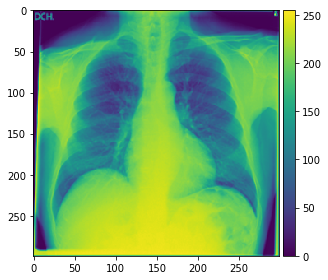

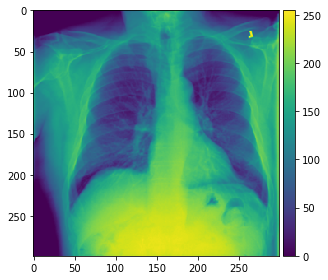

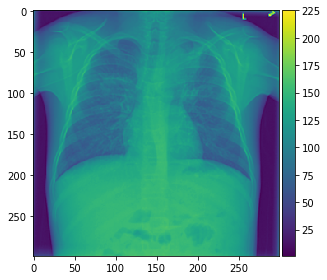

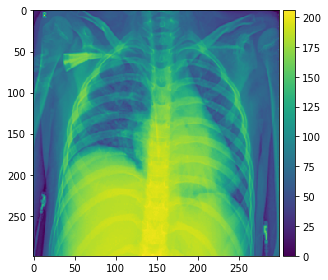

In [11]:
cantidadImg = 500
covid = imageReading(path_Covid,cantidadImg)
normal = imageReading(path_Normal,cantidadImg)
Lung_Opacity = imageReading(path_Lung_Opacity,cantidadImg)
Viral_Pneumonia = imageReading(path_Viral_Pneumonia,cantidadImg)

In [12]:
covid.shape

(500, 299, 299)

In [13]:
normal.shape

(500, 299, 299)

In [14]:
Lung_Opacity.shape

(500, 299, 299)

In [15]:
Viral_Pneumonia.shape

(500, 299, 299)

**Agregando dimensiones para que sea leido por pytorch**

In [16]:
covid = torch.from_numpy(np.array(covid).reshape(-1,1,299,299)) ## torch se convierte nuestra data en tensor - Aumenta la dimension.
normal = torch.from_numpy(np.array(normal).reshape(-1,1,299,299)) # (-1: Cantidad de imagenes, 1: gris o color, 299 x 299: tamaño de la imagen
Lung_Opacity = torch.from_numpy(np.array(Lung_Opacity).reshape(-1,1,299,299))
Viral_Pneumonia = torch.from_numpy(np.array(Viral_Pneumonia).reshape(-1,1,299,299))

In [17]:
covid.shape

torch.Size([500, 1, 299, 299])

In [18]:
covid[0]

tensor([[[ 10.,  10.,  10.,  ...,  38.,  12.,  11.],
         [  2.,   2.,   2.,  ...,  30.,  28.,   1.],
         [  0.,   0.,   0.,  ...,  37.,   7.,   1.],
         ...,
         [185., 239., 248.,  ..., 243., 230., 163.],
         [187., 231., 239.,  ..., 234., 223., 159.],
         [146., 171., 175.,  ..., 172., 165., 119.]]], dtype=torch.float64)

### Agregamos las etiquetas y transformamos a tuple

In [19]:
img_covidlist = []
for i in range(covid.shape[0]):
      img_covidlist.append((covid[i]/255.0,0.0))

img_normallist = []
for i in range(normal.shape[0]):
      img_normallist.append((normal[i]/255.0,1.0))
        
img_Lung_Opacitylist = []
for i in range(Lung_Opacity.shape[0]):
      img_Lung_Opacitylist.append((Lung_Opacity[i]/255.0,2.0))
    
img_Viral_Pneumonialist = []
for i in range(Viral_Pneumonia.shape[0]):
      img_Viral_Pneumonialist.append((Viral_Pneumonia[i]/255.0,3.0))

In [20]:
img_normallist[0]

(tensor([[[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
          ...,
          [0.0000, 0.0000, 0.0000,  ..., 0.5843, 0.6784, 0.7373],
          [0.0000, 0.0000, 0.0000,  ..., 0.5804, 0.6784, 0.7294],
          [0.0000, 0.0000, 0.0000,  ..., 0.5804, 0.6706, 0.7255]]],
        dtype=torch.float64),
 1.0)

### Verificar el Slicing y tamaño de las listas

In [21]:
import random
random.shuffle(img_covidlist)
covid_train = img_covidlist[0:int(len(img_covidlist)*0.7)]
covid_validation = img_covidlist[int(len(img_covidlist)*0.7):int(len(img_covidlist)*0.9)]
covid_test = img_covidlist[int(len(img_covidlist)*0.9):]

random.shuffle(img_normallist)
normal_train = img_normallist[0:int(len(img_normallist)*0.7)]
normal_validation = img_normallist[int(len(img_normallist)*0.7):int(len(img_normallist)*0.9)]
normal_test = img_normallist[int(len(img_normallist)*0.9):]

random.shuffle(img_Lung_Opacitylist)
Lung_Opacitylist_train = img_Lung_Opacitylist[0:int(len(img_Lung_Opacitylist)*0.7)]
Lung_Opacitylist_validation = img_Lung_Opacitylist[int(len(img_Lung_Opacitylist)*0.7):int(len(img_Lung_Opacitylist)*0.9)]
Lung_Opacitylist_test = img_Lung_Opacitylist[int(len(img_Lung_Opacitylist)*0.9):]

random.shuffle(img_Viral_Pneumonialist)
Viral_Pneumonialist_train = img_Viral_Pneumonialist[0:int(len(img_Viral_Pneumonialist)*0.7)]
Viral_Pneumonialist_validation = img_Viral_Pneumonialist[int(len(img_Viral_Pneumonialist)*0.7):int(len(img_Viral_Pneumonialist)*0.9)]
Viral_Pneumonialist_test = img_Viral_Pneumonialist[int(len(img_Viral_Pneumonialist)*0.9):]


### COVID 

In [23]:
print("El tamaño de la muestra COVID del training es {}, la validacion {} y del test es {}"\
      .format(len(covid_train), len(covid_validation),len(covid_test)))

El tamaño de la muestra COVID del training es 350, la validacion 100 y del test es 50


### NORMAL

In [24]:
print("El tamaño de la muestra NORMAL del training es {}, la validacion {} y del test es {}"\
      .format(len(normal_train), len(normal_validation),len(normal_test)))

El tamaño de la muestra NORMAL del training es 350, la validacion 100 y del test es 50


### LUNG OPACITY

In [25]:
print("El tamaño de la muestra LUNG_OPACITY del training es {}, la validacion {} y del test es {}"\
      .format(len(Lung_Opacitylist_train), len(Lung_Opacitylist_validation),len(Lung_Opacitylist_test)))

El tamaño de la muestra LUNG_OPACITY del training es 350, la validacion 100 y del test es 50


### VIRAL PNEUMONIALIST

In [26]:
print("El tamaño de la muestra VIRAL PNEUMONIA del training es {}, la validacion {} y del test es {}"\
      .format(len(Viral_Pneumonialist_train), len(Viral_Pneumonialist_validation),len(Viral_Pneumonialist_test)))

El tamaño de la muestra VIRAL PNEUMONIA del training es 350, la validacion 100 y del test es 50


### Unir Train de Covid y Normal y Test de Covid y Normal 

In [27]:
train_beta = covid_train + normal_train + Lung_Opacitylist_train + Viral_Pneumonialist_train
validation_beta = covid_validation + normal_validation + Lung_Opacitylist_validation + Viral_Pneumonialist_validation
test_beta = covid_test + normal_test + Lung_Opacitylist_test + Viral_Pneumonialist_test

In [28]:
batch_size = 16
train_loader = torch.utils.data.DataLoader(dataset=train_beta, batch_size=batch_size, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_beta, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_beta, batch_size=batch_size, shuffle=True)

## CNN

**Para la construccion de la red convolucional tener en cuenta:**
**Conv2d:** Se usa por que estamos trabajando con imagenes en 2 dimensiones
**in_channel:** Es la cantidad de canales, en caso sea una imagen en gris es 1, si es RGB es 3. Luego puede ir variando a medida que incrementamos el numero de capas.
**out_channels:** Es la cantidad de dimensiones de salida, es decir entra una imagen en escala de grises y salen 16 imagenes adicionales.
**Kernel_size:** El tamaño del kernel que se aplicara, siempre es una matriz cuadrada. Para nuestro caso 4x4
**Stride:** Espacio para el recorrido entre kernel y kernel.
**Pading:** Es una especio de relleno que se le aplica, este relleno puede darse en la parte superior o inferior.

**Nota:** Es importante conocer estos conceptos para saber la salida que se le entregara, se debe aplicar la siguiente formula:  


$\text{Tamaño de salida } = \frac{\text{Tamaño de la imagen } - \text{ Tamaño de kernel } + 2*\text{ Pading }}{Stride} + 1$

### Modelo 1 - Sin BatchNorm Sin Dropout

In [29]:
torch.manual_seed(22)
#hyperparameter 
num_classes = 4
learning_rate =  0.001
num_epochs = 20

class CNN1(nn.Module):
    def __init__(self, num_classes=4):
        super(CNN1, self).__init__()
        #input 299x299
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=4, stride=1, padding=2), #300 x 300
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2,padding=0)) #150 x 150
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=0),  #146
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))  #73x73
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=0),  #36
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.fc = nn.Linear(18*18*64, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        #print('aviso1')
        out = self.layer2(out)
        #print('aviso2')
        out = self.layer3(out)
        #print('aviso3')
        out = out.reshape(out.size(0), -1)
        #print('aviso4')
        out = self.fc(out)
        return out 

### Modelo 2 - con BatchNorm en cada capa Sin Dropout item 4

In [127]:
18*64

1152

In [38]:
torch.manual_seed(22)
#hyperparameter 
num_classes = 4
learning_rate =  0.001
num_epochs = 20

class CNN2(nn.Module):
    def __init__(self, num_classes=4):
        super(CNN2, self).__init__()
        #input 299x299
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=4, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2,padding=0), #150 x 150
            nn.BatchNorm2d(16)) 
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=0),  #146
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  #73x73
            nn.BatchNorm2d(32))
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=0),  #36
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.BatchNorm2d(64))
        
        self.fc = nn.Linear(18*18*64, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        #print('aviso1')
        out = self.layer2(out)
        #print('aviso2')
        out = self.layer3(out)
        #print('aviso3')
        out = out.reshape(out.size(0), -1)
        #print('aviso4')
        out = self.fc(out)
        return out


### Modelo 3 - sin BatchNorm con Dropout

In [123]:
18*64

1152

In [49]:
torch.manual_seed(22)
#hyperparameter 
num_classes = 4
learning_rate =  0.001
num_epochs = 20

class CNN3(nn.Module):
    def __init__(self, num_classes=4):
        super(CNN3, self).__init__()
        #input 299x299
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=4, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2,padding=0),
            nn.Dropout(p=0.5)) #150 x 150
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=0),  #146
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.2))  #73x73
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=0),  #36
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.7))
        self.fc = nn.Linear(18*18*64, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        #print('aviso1')
        out = self.layer2(out)
        #print('aviso2')
        out = self.layer3(out)
        #print('aviso3')
        out = out.reshape(out.size(0), -1)
        #print('aviso4')
        out = self.fc(out)
        return out


### Modelo 4 - con BatchNorm con Dropout en cada capa - item 5

In [50]:
torch.manual_seed(22)
#hyperparameter 
num_classes = 4
learning_rate =  0.001
num_epochs = 20

class CNN4(nn.Module):
    def __init__(self, num_classes=4):
        super(CNN4, self).__init__()
        #input 299x299
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=4, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2,padding=0), #150 x 150
            nn.Dropout(p=0.5),
            nn.BatchNorm2d(16))            
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=0),  #146
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.2),
            nn.BatchNorm2d(32))  #73x73
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=0),  #36
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.7),
            nn.BatchNorm2d(64))
        
        self.fc = nn.Linear(18*18*64, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        #print('aviso1')
        out = self.layer2(out)
        #print('aviso2')
        out = self.layer3(out)
        #print('aviso3')
        out = out.reshape(out.size(0), -1)
        #print('aviso4')
        out = self.fc(out)
        return out


### Modelo 5 - con BatchNorm con Dropout solo primera cada item 6

In [51]:
torch.manual_seed(22)
#hyperparameter 
num_classes = 4
learning_rate =  0.001
num_epochs = 20

class CNN5(nn.Module):
    def __init__(self, num_classes=4):
        super(CNN5, self).__init__()
        #input 299x299
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=4, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2,padding=0), #150 x 150
            nn.Dropout(p=0.5),
            nn.BatchNorm2d(16))            
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=0),  #146
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))  #73x73
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=0),  #36
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.fc = nn.Linear(18*18*64, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        #print('aviso1')
        out = self.layer2(out)
        #print('aviso2')
        out = self.layer3(out)
        #print('aviso3')
        out = out.reshape(out.size(0), -1)
        #print('aviso4')
        out = self.fc(out)
        return out

### Entrenamiento de nuestros modelos

### Modelo 1 - Sin BatchNorm Sin Dropout

In [30]:
model         = CNN1(num_classes).to(device)
loss_fn       = nn.CrossEntropyLoss()
optimizer     = torch.optim.Adam(model.parameters(), lr = learning_rate)

print([e.shape for e in model.fc.parameters()])

[torch.Size([4, 20736]), torch.Size([4])]


In [31]:
def train(model, optimizer, loos_fn, num_epochs):
    loss_vals = []
    running_loss =0.0
    # train the model
    total_step = len(train_loader)  # el train loader es el motor que se encarga de sacar las imagenes del train_set

    list_loss_train= []
    list_loss_validation = []
    list_time = []
    j=0
    
    best_loss = 0
    
    # Train the model
    for epoch in range(num_epochs):
        train_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            images = images.float().to(device)
            labels = labels.long().to(device)
            # forward 
            output = model(images).float()
            #Calucla el loss
            loss   = loss_fn(output, labels)
            # change the params
            # Clear the gradients of all optimized variables
            optimizer.zero_grad()
            # Backward 
            loss.backward()
            #parametros update
            optimizer.step()
            train_loss +=loss.item()
            list_time.append(j)
            j+=1

            if (i+1) % 100 == 0:
                  print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                        .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
                    
        list_loss_train.append(train_loss / len(train_loader))
        
        #validation of the model
        valid_loss =0.0   
        for i, (images, labels) in enumerate(test_loader):
            images = images.float().to(device)
            labels = labels.long().to(device)
            
            # Forward Pass
            output = model(images).float()
            # Find the Loss
            loss   = loss_fn(output, labels)
            # Calculate loss
            valid_loss +=loss.item()
        #Save loss in a List
        
        list_loss_validation.append(valid_loss / len(test_loader))
        ###Early stopping###
        if valid_loss > best_loss:
            best_loss = valid_loss
            # At this point also save a snapshot of the current model
            torch.save(model, 'my_model_best_loss.pth')
        
        print(f'Epoch {epoch+1} Training Loss: {train_loss / len(train_loader)} Validation Loss: {valid_loss / len(validation_loader)}')  
    
    print('Finished Training Trainset')
    return list_loss_train,list_loss_validation, best_loss, model

In [32]:
%%time
list_loss_train,list_loss_validation, best_loss, model = train(model,optimizer,loss_fn, num_epochs=15)

Epoch 1 Training Loss: 1.016300562091849 Validation Loss: 0.49593420505523683
Epoch 2 Training Loss: 0.8396845256740396 Validation Loss: 0.4520952439308166
Epoch 3 Training Loss: 0.7668352174487981 Validation Loss: 0.37228991985321047
Epoch 4 Training Loss: 0.6149135325103998 Validation Loss: 0.3559516417980194
Epoch 5 Training Loss: 0.5376207002184608 Validation Loss: 0.3500680112838745
Epoch 6 Training Loss: 0.44869709336622193 Validation Loss: 0.3369260233640671
Epoch 7 Training Loss: 0.38075872764668683 Validation Loss: 0.4351754528284073
Epoch 8 Training Loss: 0.34616157840090717 Validation Loss: 0.3799441361427307
Epoch 9 Training Loss: 0.3493776216425679 Validation Loss: 0.3670384931564331
Epoch 10 Training Loss: 0.284170508808033 Validation Loss: 0.3917878448963165
Epoch 11 Training Loss: 0.20856392942368984 Validation Loss: 0.3848502817749977
Epoch 12 Training Loss: 0.1773449292469939 Validation Loss: 0.45639865517616274
Epoch 13 Training Loss: 0.15583931160455738 Validation L

In [1]:
with torch.no_grad():
    y_true = []
    y_pred = []  
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.float().to(device), labels.float().to(device)           
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        y_true.append(labels.cpu().data.numpy()) 
        y_pred.append(predicted.cpu().data.numpy())  
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the {} test images: {} %'.format(len(test_beta), 100 * correct / total))

NameError: name 'torch' is not defined

In [34]:
from sklearn.metrics import confusion_matrix
import itertools

confusion_matrix(list(itertools.chain(*y_true)), list(itertools.chain(*y_pred)))

array([[36,  5,  6,  3],
       [ 4, 36,  8,  2],
       [ 4, 11, 35,  0],
       [ 1,  2,  2, 45]], dtype=int64)

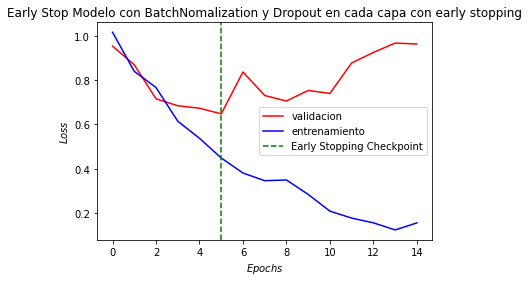

In [35]:
import matplotlib.pyplot as plt
f = plt.figure()
plt.plot( list_loss_validation, '-r', label="validacion")
plt.plot( list_loss_train, '-b', label="entrenamiento")
# find position of lowest validation loss
minposs = list_loss_validation.index(min(list_loss_validation)) 
plt.axvline(minposs, linestyle='--', color='g',label='Early Stopping Checkpoint')

plt.ylabel('$Loss$')
plt.xlabel('$Epochs$')
plt.title('Early Stop Modelo con BatchNomalization y Dropout en cada capa con early stopping')
plt.legend()
plt.show()

### Modelo 2 - con BatchNorm en cada capa Sin Dropout item 4

In [42]:
###Definicion de hiperparametros funcion loss y optimizador
model         = CNN2(num_classes).to(device)
loss_fn       = nn.CrossEntropyLoss()
optimizer     = torch.optim.Adam(model.parameters(), lr = learning_rate)

print([e.shape for e in model.fc.parameters()])

[torch.Size([4, 20736]), torch.Size([4])]


In [43]:
%%time
list_loss_train,list_loss_validation, best_loss, model = train(model,optimizer,loss_fn, num_epochs=15)

Epoch 1 Training Loss: 1.7130559242584489 Validation Loss: 0.5437727832794189
Epoch 2 Training Loss: 1.037263730710203 Validation Loss: 0.7557425546646118
Epoch 3 Training Loss: 0.738997970326719 Validation Loss: 0.6668367251940072
Epoch 4 Training Loss: 0.5108280690937218 Validation Loss: 0.6141452848911285
Epoch 5 Training Loss: 0.3009772156656254 Validation Loss: 0.7528108939528465
Epoch 6 Training Loss: 0.2289310154288118 Validation Loss: 0.6978923594951629
Epoch 7 Training Loss: 0.1457149251668439 Validation Loss: 0.5380437517911196
Epoch 8 Training Loss: 0.09528421952795312 Validation Loss: 0.6308878570795059
Epoch 9 Training Loss: 0.02449733939779848 Validation Loss: 0.6345215952396392
Epoch 10 Training Loss: 0.014805306428157068 Validation Loss: 0.6452812695503235
Epoch 11 Training Loss: 0.011928315944053546 Validation Loss: 0.6268325030803681
Epoch 12 Training Loss: 0.013808783728713726 Validation Loss: 0.5354590131342412
Epoch 13 Training Loss: 0.0020156892951903997 Validatio

In [44]:
with torch.no_grad():
    y_true = []
    y_pred = []  
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.float().to(device), labels.float().to(device)           
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        y_true.append(labels.cpu().data.numpy()) 
        y_pred.append(predicted.cpu().data.numpy())  
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the {} test images: {} %'.format(len(test_beta), 100 * correct / total))

Test Accuracy of the model on the 200 test images: 82.0 %


In [47]:
from sklearn.metrics import confusion_matrix
import itertools

confusion_matrix(list(itertools.chain(*y_true)), list(itertools.chain(*y_pred)))

array([[42,  3,  4,  1],
       [ 2, 34, 13,  1],
       [ 3,  6, 40,  1],
       [ 0,  1,  1, 48]], dtype=int64)

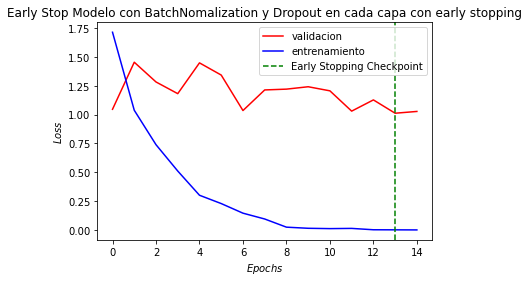

In [48]:
import matplotlib.pyplot as plt
f = plt.figure()
plt.plot( list_loss_validation, '-r', label="validacion")
plt.plot( list_loss_train, '-b', label="entrenamiento")
# find position of lowest validation loss
minposs = list_loss_validation.index(min(list_loss_validation)) 
plt.axvline(minposs, linestyle='--', color='g',label='Early Stopping Checkpoint')

plt.ylabel('$Loss$')
plt.xlabel('$Epochs$')
plt.title('Early Stop Modelo con BatchNomalization y Dropout en cada capa con early stopping')
plt.legend()
plt.show()

### Modelo 3 - sin BatchNorm con Dropout

In [52]:
model         = CNN3(num_classes).to(device)
loss_fn       = nn.CrossEntropyLoss()
optimizer     = torch.optim.Adam(model.parameters(), lr = learning_rate)

print([e.shape for e in model.fc.parameters()])

[torch.Size([4, 20736]), torch.Size([4])]


In [53]:
%%time
list_loss_train,list_loss_validation, best_loss, model = train(model,optimizer,loss_fn, num_epochs=15)

Epoch 1 Training Loss: 1.101224524392323 Validation Loss: 0.4745699620246887
Epoch 2 Training Loss: 0.9005745513872667 Validation Loss: 0.4851282000541687
Epoch 3 Training Loss: 0.8216842043806206 Validation Loss: 0.44790322065353394
Epoch 4 Training Loss: 0.8185384375127879 Validation Loss: 0.4096533489227295
Epoch 5 Training Loss: 0.7863559448583559 Validation Loss: 0.44338701605796815
Epoch 6 Training Loss: 0.7574217925694856 Validation Loss: 0.42093644857406615
Epoch 7 Training Loss: 0.7494246803901412 Validation Loss: 0.43404326438903806
Epoch 8 Training Loss: 0.7079631848768755 Validation Loss: 0.4481521964073181
Epoch 9 Training Loss: 0.7046096440065991 Validation Loss: 0.38890786409378053
Epoch 10 Training Loss: 0.7149549878456376 Validation Loss: 0.3944482469558716
Epoch 11 Training Loss: 0.6881966130300001 Validation Loss: 0.4046930706501007
Epoch 12 Training Loss: 0.6737058348953724 Validation Loss: 0.38552963495254516
Epoch 13 Training Loss: 0.6222866157239134 Validation Lo

KeyboardInterrupt: 

In [54]:
with torch.no_grad():
    y_true = []
    y_pred = []  
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.float().to(device), labels.float().to(device)           
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        y_true.append(labels.cpu().data.numpy()) 
        y_pred.append(predicted.cpu().data.numpy())  
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the {} test images: {} %'.format(len(test_beta), 100 * correct / total))

Test Accuracy of the model on the 200 test images: 73.0 %


In [103]:
from sklearn.metrics import confusion_matrix
import itertools

confusion_matrix(list(itertools.chain(*y_true)), list(itertools.chain(*y_pred)))

array([[23,  1,  5,  1],
       [ 1, 24,  4,  1],
       [ 5,  3, 22,  0],
       [ 1,  2,  2, 25]], dtype=int64)

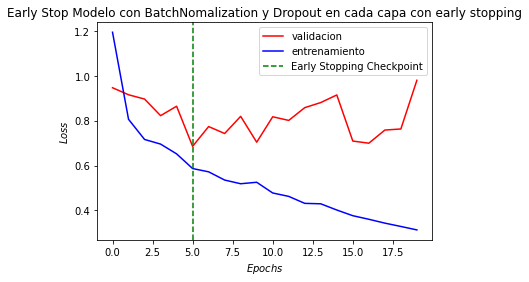

In [104]:
import matplotlib.pyplot as plt
f = plt.figure()
plt.plot( list_loss_validation, '-r', label="validacion")
plt.plot( list_loss_train, '-b', label="entrenamiento")
# find position of lowest validation loss
minposs = list_loss_validation.index(min(list_loss_validation)) 
plt.axvline(minposs, linestyle='--', color='g',label='Early Stopping Checkpoint')

plt.ylabel('$Loss$')
plt.xlabel('$Epochs$')
plt.title('Early Stop Modelo con BatchNomalization y Dropout en cada capa con early stopping')
plt.legend()
plt.show()

### Modelo 4 - con BatchNorm con Dropout en cada capa - item 5

In [55]:
model         = CNN4(num_classes).to(device)
loss_fn       = nn.CrossEntropyLoss()
optimizer     = torch.optim.Adam(model.parameters(), lr = learning_rate)

print([e.shape for e in model.fc.parameters()])

[torch.Size([4, 20736]), torch.Size([4])]


In [56]:
%%time
list_loss_train,list_loss_validation, best_loss, model = train(model,optimizer,loss_fn, num_epochs=15)

Epoch 1 Training Loss: 1.164886667647145 Validation Loss: 0.599676604270935
Epoch 2 Training Loss: 1.1030225980688224 Validation Loss: 0.6521729779243469
Epoch 3 Training Loss: 1.033579414033077 Validation Loss: 0.6513590919971466
Epoch 4 Training Loss: 0.9883976715870879 Validation Loss: 0.6931633460521698
Epoch 5 Training Loss: 1.0489735857329585 Validation Loss: 0.6154578137397766
Epoch 6 Training Loss: 0.9275437523187562 Validation Loss: 0.7674978905916214
Epoch 7 Training Loss: 0.8685584533959627 Validation Loss: 0.548427522778511
Epoch 8 Training Loss: 0.8013839127326553 Validation Loss: 0.7149565100669861
Epoch 9 Training Loss: 0.7238432693041184 Validation Loss: 0.7296508717536926
Epoch 10 Training Loss: 0.7965519420633261 Validation Loss: 0.7086760425567626
Epoch 11 Training Loss: 0.747833083129742 Validation Loss: 0.5997853446006775
Epoch 12 Training Loss: 0.6527616227130321 Validation Loss: 0.6325818848609924
Epoch 13 Training Loss: 0.6849099641496484 Validation Loss: 0.8355

In [57]:
with torch.no_grad():
    y_true = []
    y_pred = []  
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.float().to(device), labels.float().to(device)           
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        y_true.append(labels.cpu().data.numpy()) 
        y_pred.append(predicted.cpu().data.numpy())  
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the {} test images: {} %'.format(len(test_beta), 100 * correct / total))

Test Accuracy of the model on the 200 test images: 72.0 %


In [58]:
from sklearn.metrics import confusion_matrix
import itertools

confusion_matrix(list(itertools.chain(*y_true)), list(itertools.chain(*y_pred)))

array([[31, 12,  4,  3],
       [ 8, 32,  7,  3],
       [ 6, 10, 33,  1],
       [ 1,  0,  1, 48]], dtype=int64)

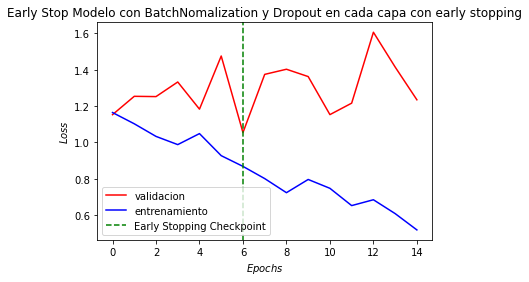

In [59]:
import matplotlib.pyplot as plt
f = plt.figure()
plt.plot( list_loss_validation, '-r', label="validacion")
plt.plot( list_loss_train, '-b', label="entrenamiento")
# find position of lowest validation loss
minposs = list_loss_validation.index(min(list_loss_validation)) 
plt.axvline(minposs, linestyle='--', color='g',label='Early Stopping Checkpoint')

plt.ylabel('$Loss$')
plt.xlabel('$Epochs$')
plt.title('Early Stop Modelo con BatchNomalization y Dropout en cada capa con early stopping')
plt.legend()
plt.show()

### Modelo 5 - con BatchNorm con Dropout solo primera capa item 6

In [60]:
model         = CNN5(num_classes).to(device)
loss_fn       = nn.CrossEntropyLoss()
optimizer     = torch.optim.Adam(model.parameters(), lr = learning_rate)

print([e.shape for e in model.fc.parameters()])

[torch.Size([4, 20736]), torch.Size([4])]


In [61]:
%%time
list_loss_train,list_loss_validation, best_loss, model = train(model,optimizer,loss_fn, num_epochs=15)

Epoch 1 Training Loss: 1.0457192449407144 Validation Loss: 0.38256058931350706
Epoch 2 Training Loss: 0.679288810627027 Validation Loss: 0.3746680283546448
Epoch 3 Training Loss: 0.5716125797480345 Validation Loss: 0.3203323304653168
Epoch 4 Training Loss: 0.4812793071297082 Validation Loss: 0.37026256799697876
Epoch 5 Training Loss: 0.4098985308611935 Validation Loss: 0.33631564170122147
Epoch 6 Training Loss: 0.3672626876187595 Validation Loss: 0.33174043387174607
Epoch 7 Training Loss: 0.30117723159492016 Validation Loss: 0.29796549409627915
Epoch 8 Training Loss: 0.29505264378068125 Validation Loss: 0.4183060568571091
Epoch 9 Training Loss: 0.25395931430499663 Validation Loss: 0.40195121049880983
Epoch 10 Training Loss: 0.20928836823441088 Validation Loss: 0.49111954748630526
Epoch 11 Training Loss: 0.1820306922732429 Validation Loss: 0.54114601790905
Epoch 12 Training Loss: 0.16627288522960787 Validation Loss: 0.6093108034133912
Epoch 13 Training Loss: 0.15146957791876048 Validati

In [62]:
with torch.no_grad():
    y_true = []
    y_pred = []  
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.float().to(device), labels.float().to(device)           
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        y_true.append(labels.cpu().data.numpy()) 
        y_pred.append(predicted.cpu().data.numpy())  
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the {} test images: {} %'.format(len(test_beta), 100 * correct / total))

Test Accuracy of the model on the 200 test images: 76.5 %


In [63]:
from sklearn.metrics import confusion_matrix
import itertools

confusion_matrix(list(itertools.chain(*y_true)), list(itertools.chain(*y_pred)))

array([[34,  6,  8,  2],
       [ 4, 37,  8,  1],
       [ 7,  7, 35,  1],
       [ 1,  1,  1, 47]], dtype=int64)

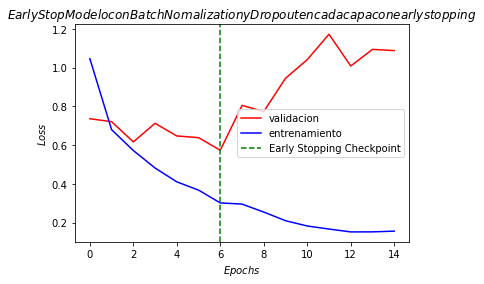

In [64]:
import matplotlib.pyplot as plt
f = plt.figure()
plt.plot( list_loss_validation, '-r', label="validacion")
plt.plot( list_loss_train, '-b', label="entrenamiento")
# find position of lowest validation loss
minposs = list_loss_validation.index(min(list_loss_validation)) 
plt.axvline(minposs, linestyle='--', color='g',label='Early Stopping Checkpoint')

plt.ylabel('$Loss$')
plt.xlabel('$Epochs$')
plt.title('$Early Stop Modelo con BatchNomalization y Dropout en cada capa con early stopping$')
plt.legend()
plt.show()

## 7. Pruebe utilizando EarlyStopping, grafique funcion de perdida

### Early Stopping

In [65]:
model         = CNN3(num_classes).to(device)
loss_fn       = nn.CrossEntropyLoss()
optimizer     = torch.optim.Adam(model.parameters(), lr = learning_rate)

print([e.shape for e in model.fc.parameters()])

[torch.Size([4, 20736]), torch.Size([4])]


In [66]:
%%time
list_loss_train,list_loss_validation, best_loss, model = train(model,optimizer,loss_fn, num_epochs=15)

Epoch 1 Training Loss: 1.1779556132175706 Validation Loss: 0.4733431339263916
Epoch 2 Training Loss: 0.8909015100110661 Validation Loss: 0.4467621374130249
Epoch 3 Training Loss: 0.8503501919860189 Validation Loss: 0.43477649450302125
Epoch 4 Training Loss: 0.8380331261591478 Validation Loss: 0.43941456913948057
Epoch 5 Training Loss: 0.8029594075950709 Validation Loss: 0.4420305871963501
Epoch 6 Training Loss: 0.7692619863558899 Validation Loss: 0.46509039878845215
Epoch 7 Training Loss: 0.7663680176165971 Validation Loss: 0.38572116613388063
Epoch 8 Training Loss: 0.7520814800465648 Validation Loss: 0.3650548553466797
Epoch 9 Training Loss: 0.7452863844280894 Validation Loss: 0.4045355498790741
Epoch 10 Training Loss: 0.6983747766776518 Validation Loss: 0.36891483902931216
Epoch 11 Training Loss: 0.6439644162627783 Validation Loss: 0.3481470787525177
Epoch 12 Training Loss: 0.6125527598302473 Validation Loss: 0.3509997642040253
Epoch 13 Training Loss: 0.5683039677414027 Validation Lo

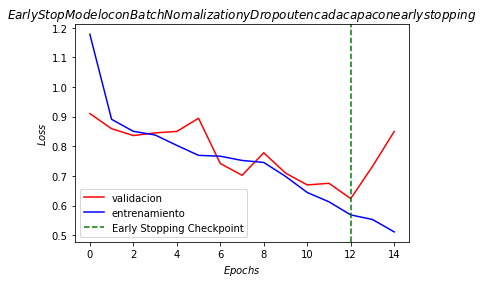

In [67]:
import matplotlib.pyplot as plt
f = plt.figure()
plt.plot( list_loss_validation, '-r', label="validacion")
plt.plot( list_loss_train, '-b', label="entrenamiento")
# find position of lowest validation loss
minposs = list_loss_validation.index(min(list_loss_validation)) 
plt.axvline(minposs, linestyle='--', color='g',label='Early Stopping Checkpoint')

plt.ylabel('$Loss$')
plt.xlabel('$Epochs$')
plt.title('$Early Stop Modelo con BatchNomalization y Dropout en cada capa con early stopping$')
plt.legend()
plt.show()

## 8. 70% para entrenamiento y el resto para testing

In [75]:

#path_Covid = r'C:\Users\ASUS\Desktop\UTEC\Redes Neuronales (CNN)\Clasificador\Dataset 2\COVID' 
#path_Normal = r'C:\Users\ASUS\Desktop\UTEC\Redes Neuronales (CNN)\Clasificador\Dataset 2\Normal'
#path_Lung_Opacity = r'C:\Users\ASUS\Desktop\UTEC\Redes Neuronales (CNN)\Clasificador\Dataset 2\Lung_Opacity'
#path_Viral_Pneumonia = r'C:\Users\ASUS\Desktop\UTEC\Redes Neuronales (CNN)\Clasificador\Dataset 2\Viral Pneumonia'


path_Covid = r'C:\Users\Cracker31\Desktop\JOSE\maestria\UTEC\ciclo2\ai\proyecto3\archive\COVID-19_Radiography_Dataset\COVID' 
path_Normal = r'C:\Users\Cracker31\Desktop\JOSE\maestria\UTEC\ciclo2\ai\proyecto3\archive\COVID-19_Radiography_Dataset\Normal'
path_Lung_Opacity = r'C:\Users\Cracker31\Desktop\JOSE\maestria\UTEC\ciclo2\ai\proyecto3\archive\COVID-19_Radiography_Dataset\Lung_Opacity'
path_Viral_Pneumonia = r'C:\Users\Cracker31\Desktop\JOSE\maestria\UTEC\ciclo2\ai\proyecto3\archive\COVID-19_Radiography_Dataset\Viral Pneumonia'

In [76]:
#### Funcion para leer imagenes dentro de una carpeta
width = 299
height = 299
def imageReading (path,files):
    folderFilesids = os.listdir(path)
    filesRandom = random.sample(folderFilesids, files)
    #folderFilesids = os.listdir(path)
    images = np.zeros((files, height, width))
    for count, n in enumerate(filesRandom):
        if(count == files):
          break
        else:
          path1 = path + '\\' + n
          originalImage = imread(path1)
          if (len(originalImage.shape)==2):
              originalImage = imread(path1)[:,:]
          if (len(originalImage.shape)==3):
              originalImage = imread(path1)[:,:,0]
          #print(originalImage.shape)
          images[count] = originalImage
    imshow(images[0])
    plt.show()
    return images
"""
def imageReading (path):
    folderFilesids = os.listdir(path)
    images = np.zeros((len(folderFilesids), height, width))
    for count, n in enumerate(folderFilesids):
        path1 = path + '\\' + n
        originalImage = imread(path1)
        if (len(originalImage.shape)==2):
            originalImage = imread(path1)[:,:]
        if (len(originalImage.shape)==3):
            originalImage = imread(path1)[:,:,0]
        #print(originalImage.shape)
        images[count] = originalImage
    imshow(images[0])
    plt.show()
    return images
"""

"\ndef imageReading (path):\n    folderFilesids = os.listdir(path)\n    images = np.zeros((len(folderFilesids), height, width))\n    for count, n in enumerate(folderFilesids):\n        path1 = path + '\\' + n\n        originalImage = imread(path1)\n        if (len(originalImage.shape)==2):\n            originalImage = imread(path1)[:,:]\n        if (len(originalImage.shape)==3):\n            originalImage = imread(path1)[:,:,0]\n        #print(originalImage.shape)\n        images[count] = originalImage\n    imshow(images[0])\n    plt.show()\n    return images\n"

C:\Users\Cracker31\anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


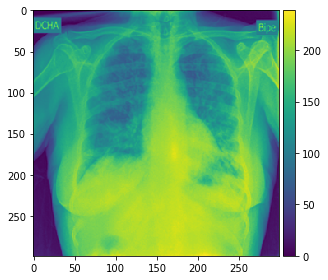

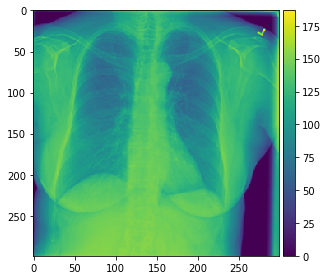

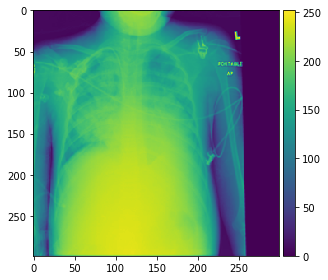

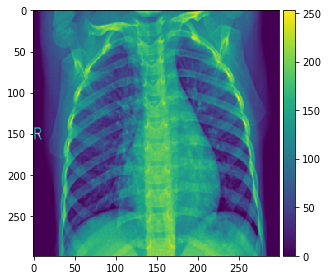

In [77]:
cantintidadImg = 500
covid = imageReading(path_Covid,cantintidadImg)
normal = imageReading(path_Normal,cantintidadImg)
Lung_Opacity = imageReading(path_Lung_Opacity,cantintidadImg)
Viral_Pneumonia = imageReading(path_Viral_Pneumonia,cantintidadImg)

In [79]:
print("covid.shape {} ,normal.shape {} ,Lung_Opacity.shape {} ,Viral_Pneumonia.shape {} ".format(covid.shape,normal.shape,Lung_Opacity.shape,Viral_Pneumonia.shape))

covid.shape (500, 299, 299) ,normal.shape (500, 299, 299) ,Lung_Opacity.shape (500, 299, 299) ,Viral_Pneumonia.shape (500, 299, 299) 


In [80]:
covid = torch.from_numpy(np.array(covid).reshape(-1,1,299,299)) ## torch se convierte nuestra data en tensor - Aumenta la dimension.
normal = torch.from_numpy(np.array(normal).reshape(-1,1,299,299)) # (-1: Cantidad de imagenes, 1: gris o color, 299 x 299: tamaño de la imagen
Lung_Opacity = torch.from_numpy(np.array(Lung_Opacity).reshape(-1,1,299,299))
Viral_Pneumonia = torch.from_numpy(np.array(Viral_Pneumonia).reshape(-1,1,299,299))

In [81]:
covid.shape

torch.Size([500, 1, 299, 299])

In [82]:
covid[0]

tensor([[[  1.,   1.,   0.,  ..., 118., 146., 171.],
         [  1.,   1.,   0.,  ..., 112., 137., 164.],
         [  1.,   1.,   0.,  ..., 106., 132., 162.],
         ...,
         [ 21.,  19.,  20.,  ...,  23.,  28.,  34.],
         [ 22.,  20.,  20.,  ...,  27.,  32.,  38.],
         [ 24.,  22.,  22.,  ...,  31.,  38.,  44.]]], dtype=torch.float64)

### Agregamos las etiquetas y transformamos a tuple

In [83]:
img_covidlist = []
for i in range(covid.shape[0]):
      img_covidlist.append((covid[i]/255.0,0.0))

img_normallist = []
for i in range(normal.shape[0]):
      img_normallist.append((normal[i]/255.0,1.0))
        
img_Lung_Opacitylist = []
for i in range(Lung_Opacity.shape[0]):
      img_Lung_Opacitylist.append((Lung_Opacity[i]/255.0,2.0))
    
img_Viral_Pneumonialist = []
for i in range(Viral_Pneumonia.shape[0]):
      img_Viral_Pneumonialist.append((Viral_Pneumonia[i]/255.0,3.0))

In [84]:
img_normallist[0]

(tensor([[[0.2431, 0.2039, 0.1647,  ..., 0.5137, 0.5137, 0.5098],
          [0.1765, 0.1255, 0.0902,  ..., 0.5137, 0.5098, 0.5098],
          [0.1255, 0.0824, 0.0471,  ..., 0.5255, 0.5137, 0.5098],
          ...,
          [0.2824, 0.3059, 0.3333,  ..., 0.4667, 0.4627, 0.4627],
          [0.3020, 0.3294, 0.3490,  ..., 0.4667, 0.4667, 0.4627],
          [0.3294, 0.3490, 0.3725,  ..., 0.4706, 0.4667, 0.4667]]],
        dtype=torch.float64),
 1.0)

In [85]:
import random
random.shuffle(img_covidlist)
covid_train = img_covidlist[0:int(len(img_covidlist)*0.7)]
covid_test = img_covidlist[int(len(img_covidlist)*0.7):]

random.shuffle(img_normallist)
normal_train = img_normallist[0:int(len(img_normallist)*0.7)]
normal_test = img_normallist[int(len(img_normallist)*0.7):]

random.shuffle(img_Lung_Opacitylist)
Lung_Opacitylist_train = img_Lung_Opacitylist[0:int(len(img_Lung_Opacitylist)*0.7)]
Lung_Opacitylist_test = img_Lung_Opacitylist[int(len(img_Lung_Opacitylist)*0.7):]

random.shuffle(img_Viral_Pneumonialist)
Viral_Pneumonialist_train = img_Viral_Pneumonialist[0:int(len(img_Viral_Pneumonialist)*0.7)]
Viral_Pneumonialist_test = img_Viral_Pneumonialist[int(len(img_Viral_Pneumonialist)*0.7):]

### COVID - NORMAL - LUNG OPACITY - VIRAL PNEUMONIALIST

In [86]:
print("El tamaño de la muestra COVID del training es {} y del test es {}"\
      .format(len(covid_train),len(covid_test)))
print("El tamaño de la muestra NORMAL del training es {}, y del test es {}"\
      .format(len(normal_train),len(normal_test)))
print("El tamaño de la muestra LUNG_OPACITY del training es {}, y del test es {}"\
      .format(len(Lung_Opacitylist_train),len(Lung_Opacitylist_test)))
print("El tamaño de la muestra VIRAL PNEUMONIA del training es {}, y del test es {}"\
      .format(len(Viral_Pneumonialist_train),len(Viral_Pneumonialist_test)))

El tamaño de la muestra COVID del training es 350 y del test es 150
El tamaño de la muestra NORMAL del training es 350, y del test es 150
El tamaño de la muestra LUNG_OPACITY del training es 350, y del test es 150
El tamaño de la muestra VIRAL PNEUMONIA del training es 350, y del test es 150


### Unir Train de Covid y Normal y Test de Covid y Normal 

In [87]:
batch_size = 16
train_loader = torch.utils.data.DataLoader(dataset=train_beta, batch_size=batch_size, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset=validation_beta, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_beta, batch_size=batch_size, shuffle=True)

### Modelo 3 - sin BatchNorm con Dropout

In [88]:
torch.manual_seed(22)
#hyperparameter 
num_classes = 4
learning_rate =  0.001
num_epochs = 20

class CNN3(nn.Module):
    def __init__(self, num_classes=4):
        super(CNN3, self).__init__()
        #input 299x299
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=4, stride=1, padding=2),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2,padding=0),
            nn.Dropout(p=0.5)) #150 x 150
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=0),  #146
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.2))  #73x73
        self.layer3 = nn.Sequential(
            nn.Conv2d(32, 64, kernel_size=3, stride=2, padding=0),  #36
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Dropout(p=0.7))
        
        self.fc = nn.Linear(18*18*64, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        #print('aviso1')
        out = self.layer2(out)
        #print('aviso2')
        out = self.layer3(out)
        #print('aviso3')
        out = out.reshape(out.size(0), -1)
        #print('aviso4')
        out = self.fc(out)
        return out


In [89]:
model         = CNN1(num_classes).to(device)
loss_fn       = nn.CrossEntropyLoss()
optimizer     = torch.optim.Adam(model.parameters(), lr = learning_rate)

print([e.shape for e in model.fc.parameters()])

[torch.Size([4, 20736]), torch.Size([4])]


In [90]:
def train(model, optimizer, loos_fn, num_epochs):
    loss_vals = []
    running_loss =0.0
    # train the model
    total_step = len(train_loader)  # el train loader es el motor que se encarga de sacar las imagenes del train_set

    list_loss_train= []
    list_loss_validation = []
    list_time = []
    j=0
    
    best_loss = 0
    
    # Train the model
    for epoch in range(num_epochs):
        train_loss = 0.0
        for i, (images, labels) in enumerate(train_loader):
            images = images.float().to(device)
            labels = labels.long().to(device)
            # forward 
            output = model(images).float()
            #Calucla el loss
            loss   = loss_fn(output, labels)
            # change the params
            # Clear the gradients of all optimized variables
            optimizer.zero_grad()
            # Backward 
            loss.backward()
            #parametros update
            optimizer.step()
            train_loss +=loss.item()
            list_time.append(j)
            j+=1

            if (i+1) % 100 == 0:
                  print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                        .format(epoch+1, num_epochs, i+1, total_step, loss.item()))
                    
        list_loss_train.append(train_loss / len(train_loader))
        
        #validation of the model
        valid_loss =0.0   
        for i, (images, labels) in enumerate(test_loader):
            images = images.float().to(device)
            labels = labels.long().to(device)
            
            # Forward Pass
            output = model(images).float()
            # Find the Loss
            loss   = loss_fn(output, labels)
            # Calculate loss
            valid_loss +=loss.item()
        #Save loss in a List
        
        list_loss_validation.append(valid_loss / len(test_loader))
        ###Early stopping###
        if valid_loss > best_loss:
            best_loss = valid_loss
            # At this point also save a snapshot of the current model
            torch.save(model, 'my_model_best_loss.pth')
        
        print(f'Epoch {epoch+1} Training Loss: {train_loss / len(train_loader)} Validation Loss: {valid_loss / len(validation_loader)}')  
    
    print('Finished Training Trainset')
    return list_loss_train,list_loss_validation, best_loss, model

In [91]:
%%time
list_loss_train,list_loss_validation, best_loss, model = train(model,optimizer,loss_fn, num_epochs=15)

Epoch 1 Training Loss: 1.016300562091849 Validation Loss: 0.49593420505523683
Epoch 2 Training Loss: 0.8396845256740396 Validation Loss: 0.4520952439308166
Epoch 3 Training Loss: 0.7668352174487981 Validation Loss: 0.37228991985321047
Epoch 4 Training Loss: 0.6149135325103998 Validation Loss: 0.3559516417980194
Epoch 5 Training Loss: 0.5376207002184608 Validation Loss: 0.3500680112838745
Epoch 6 Training Loss: 0.44869709336622193 Validation Loss: 0.3369260233640671
Epoch 7 Training Loss: 0.38075872764668683 Validation Loss: 0.4351754528284073
Epoch 8 Training Loss: 0.34616157840090717 Validation Loss: 0.3799441361427307
Epoch 9 Training Loss: 0.3493776216425679 Validation Loss: 0.3670384931564331
Epoch 10 Training Loss: 0.284170508808033 Validation Loss: 0.3917878448963165
Epoch 11 Training Loss: 0.20856392942368984 Validation Loss: 0.3848502817749977
Epoch 12 Training Loss: 0.1773449292469939 Validation Loss: 0.45639865517616274
Epoch 13 Training Loss: 0.15583931160455738 Validation L

In [92]:
with torch.no_grad():
    y_true = []
    y_pred = []  
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.float().to(device), labels.float().to(device)           
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        y_true.append(labels.cpu().data.numpy()) 
        y_pred.append(predicted.cpu().data.numpy())  
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the {} test images: {} %'.format(len(test_beta), 100 * correct / total))

Test Accuracy of the model on the 200 test images: 76.0 %


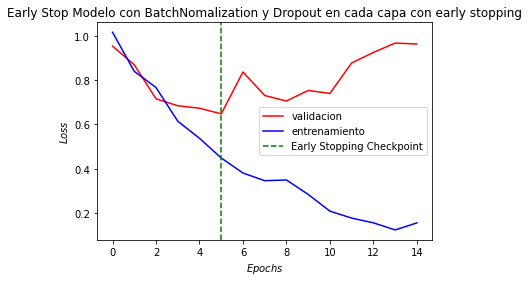

In [94]:
import matplotlib.pyplot as plt
f = plt.figure()
plt.plot( list_loss_validation, '-r', label="validacion")
plt.plot( list_loss_train, '-b', label="entrenamiento")
# find position of lowest validation loss
minposs = list_loss_validation.index(min(list_loss_validation)) 
plt.axvline(minposs, linestyle='--', color='g',label='Early Stopping Checkpoint')

plt.ylabel('$Loss$')
plt.xlabel('$Epochs$')
plt.title('Early Stop Modelo con BatchNomalization y Dropout en cada capa con early stopping')
plt.legend()
plt.show()

In [95]:
from sklearn.metrics import confusion_matrix
import itertools

confusion_matrix(list(itertools.chain(*y_true)), list(itertools.chain(*y_pred)))

array([[36,  5,  6,  3],
       [ 4, 36,  8,  2],
       [ 4, 11, 35,  0],
       [ 1,  2,  2, 45]], dtype=int64)

In [96]:
%%time
list_loss_train,list_loss_validation, best_loss, model = train(model,optimizer,loss_fn, num_epochs=4)

Epoch 1 Training Loss: 0.08986950384992683 Validation Loss: 0.45277553409337995
Epoch 2 Training Loss: 0.06037667757746848 Validation Loss: 0.5958142840862274
Epoch 3 Training Loss: 0.036162224036657295 Validation Loss: 0.6146336874365806
Epoch 4 Training Loss: 0.02718855711282231 Validation Loss: 0.6353921592235565
Finished Training Trainset
Wall time: 3min 28s


In [97]:

%%time
# Clear the gradients of all optimized variables
optimizer.zero_grad()
list_loss_train,list_loss_validation, best_loss, model = train(model,optimizer,loss_fn, num_epochs=2)

Epoch 1 Training Loss: 0.043414811850446065 Validation Loss: 0.7395116198062897
Epoch 2 Training Loss: 0.02267805402615605 Validation Loss: 0.6347175344824791
Finished Training Trainset
Wall time: 1min 41s


In [98]:
from sklearn.metrics import confusion_matrix
import itertools

confusion_matrix(list(itertools.chain(*y_true)), list(itertools.chain(*y_pred)))

array([[36,  5,  6,  3],
       [ 4, 36,  8,  2],
       [ 4, 11, 35,  0],
       [ 1,  2,  2, 45]], dtype=int64)

In [99]:
with torch.no_grad():
    y_true = []
    y_pred = []  
    correct = 0
    total = 0
    for images, labels in test_loader:
        images, labels = images.float().to(device), labels.float().to(device)           
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        y_true.append(labels.cpu().data.numpy()) 
        y_pred.append(predicted.cpu().data.numpy())  
        correct += (predicted == labels).sum().item()
    print('Test Accuracy of the model on the {} test images: {} %'.format(len(test_beta), 100 * correct / total))

Test Accuracy of the model on the 200 test images: 77.0 %
